In [0]:
import numpy as np
import tensorflow as tf
corpus_raw = 'He is the king . The king is royal . She is the royal  queen '
# convert to lower case
corpus_raw = corpus_raw.lower()



[Quick Brown Fox Example](https://drive.google.com/open?id=1n8ElxWjh1a9kdPTCBbCmvP7MKj5vtD4U)

In [0]:
words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)
words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [3]:
print(word2int['queen'])

3


In [7]:
print(int2word[3])

queen


In [8]:
print(word2int['king'])

0


In [9]:
print(int2word[0])

king


### Creation of sentences

In [0]:
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [11]:
print(sentences)

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


### Creation of windows for word pairs

In [0]:
data = []
WINDOW_SIZE = 2
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

In [13]:
print(data)

[['he', 'is'], ['he', 'the'], ['is', 'he'], ['is', 'the'], ['is', 'king'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the'], ['the', 'king'], ['the', 'is'], ['king', 'the'], ['king', 'is'], ['king', 'royal'], ['is', 'the'], ['is', 'king'], ['is', 'royal'], ['royal', 'king'], ['royal', 'is'], ['she', 'is'], ['she', 'the'], ['is', 'she'], ['is', 'the'], ['is', 'royal'], ['the', 'she'], ['the', 'is'], ['the', 'royal'], ['the', 'queen'], ['royal', 'is'], ['royal', 'the'], ['royal', 'queen'], ['queen', 'the'], ['queen', 'royal']]


### One-hot vector encoding
say we have a vocabulary of 3 words : pen, pineapple, apple

- word2int['pen'] -> 0 -> [1 0 0]
- word2int['pineapple'] -> 1 -> [0 1 0]
- word2int['apple'] -> 2 -> [0 0 1]

In [0]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp
x_train = [] # input word
y_train = [] # output word
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [15]:
print(x_train)

[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


In [16]:
print(x_train.shape, y_train.shape)

(34, 7) (34, 7)


### Creation of Tensorflow model
#### Create Placeholders

In [0]:
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

[Architecture](https://drive.google.com/open?id=1svyZ4AxL5YX4j1Wl_QGYVcCC9iiP6iXR)

In [0]:
EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

[Predictions](https://drive.google.com/open?id=122xvSIqD1G5tkAdO7BmT4gLAtKL990A4)

In [0]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

[Summary of embeddings](https://drive.google.com/open?id=1vlUxYlCAp_U0QmWgYizn8SRgxEpPsDDm)

In [0]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 10000
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

In [21]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[ 0.11995198  0.05235916 -0.00252951  1.7535975   0.4686913 ]
 [-1.4756694   0.17503612 -1.76187    -0.4813566  -0.6249435 ]
 [-1.7231231  -0.30293754  0.59900236  0.39750138  0.01570713]
 [ 0.92398554 -2.0858347   0.5572174   0.27773723  0.08335201]
 [ 1.4416847   0.5458765   0.61699885 -1.7098467  -1.4785556 ]
 [ 0.8200696   0.721835   -0.54296786 -1.1632943   2.1976342 ]
 [-1.4835261   0.6136435   0.70306635  1.4862514  -0.3040603 ]]
----------
[-1.1953249  -1.0833192   0.81202847  0.24949035 -0.01329913]
----------


In [22]:
vectors = sess.run(W1 + b1)

# if you work it out, you will see that it has the same effect as running the node hidden representation
print(vectors)

[[-1.0753729e+00 -1.0309601e+00  8.0949897e-01  2.0030878e+00
   4.5539215e-01]
 [-2.6709943e+00 -9.0828305e-01 -9.4984156e-01 -2.3186624e-01
  -6.3824260e-01]
 [-2.9184480e+00 -1.3862567e+00  1.4110308e+00  6.4699173e-01
   2.4079951e-03]
 [-2.7133936e-01 -3.1691539e+00  1.3692459e+00  5.2722758e-01
   7.0052877e-02]
 [ 2.4635983e-01 -5.3744268e-01  1.4290273e+00 -1.4603564e+00
  -1.4918547e+00]
 [-3.7525529e-01 -3.6148417e-01  2.6906061e-01 -9.1380394e-01
   2.1843350e+00]
 [-2.6788511e+00 -4.6967566e-01  1.5150948e+00  1.7357417e+00
  -3.1735945e-01]]


In [23]:
print(vectors[ word2int['queen'] ])

[-0.27133936 -3.169154    1.3692459   0.5272276   0.07005288]


In [0]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))
def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [29]:
print(int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['he'], vectors)])
print(int2word[find_closest(word2int['she'], vectors)])

king
she
he


In [0]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [0]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

king -0.96309465
royal -0.86308813
he -0.4225477
queen -0.9945276
is 0.83077204
the 0.6369875
she -0.17015862


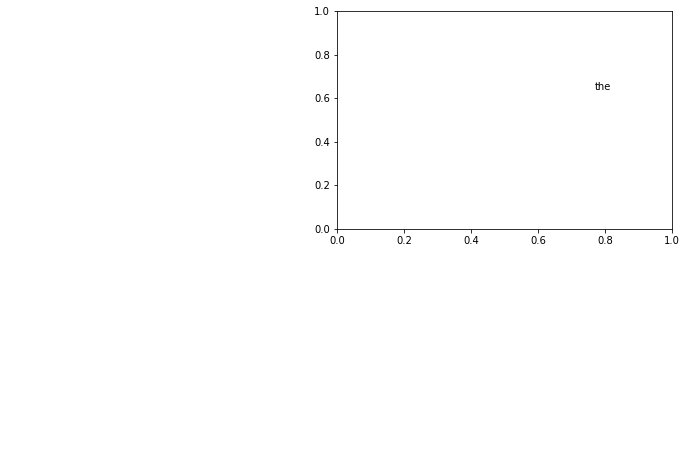

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()